In [1]:
import matplotlib.pyplot as plt
import csv
import os
import sys
from mpl_toolkits import mplot3d
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
from itertools import combinations
import math

# for interactive plots
%matplotlib qt

In [2]:
def getData1D(filepath):
    file = open(filepath)
    reader = csv.reader(file)
    data_str = list(reader)
    file.close()
    X = [float(x[0]) for x in data_str]
    return X

def getData2D(filepath):
    file = open(filepath)
    reader = csv.reader(file)
    data_str = list(reader)
    file.close()
    X1 = [float(x[2]) for x in data_str]
    X2 = [float(x[3]) for x in data_str]
    return X1, X2

def getData5D(filepath):
    file = open(filepath)
    reader = csv.reader(file)
    data_str = list(reader)
    file.close()
    X1 = [float(x[0]) for x in data_str[1:]]
    X2 = [float(x[1]) for x in data_str[1:]]
    X3 = [float(x[2]) for x in data_str[1:]]
    X4 = [float(x[3]) for x in data_str[1:]]
    rob = [float(x[4]) for x in data_str[1:]]
    return X1, X2, X3, X4, rob

In [18]:
################################################
# PARAMETERS (set it up YO-self)
################################################

#
scenario_names = ['LVM1', 'LVM2', 'LVDAD', 'LVD', 'pov_unprotected_left']
#
scenario = scenario_names[3]
#
FOLDER_PATH = '../../results/'+scenario
#
X1_name = 'alpha_lon_accel_max'
X2_name = 'alpha_lon_brake_max'
X3_name = 'alpha_lon_brake_min'
X4_name = 'response_time'
#
flag_plot_surface = False
fontsize =15
#


In [20]:
# get data from file
x1, x2, x3, x4, rob = getData5D(os.path.join(FOLDER_PATH, scenario + '_combined.csv'))
X1 = x1
X2 = x4 
R = rob

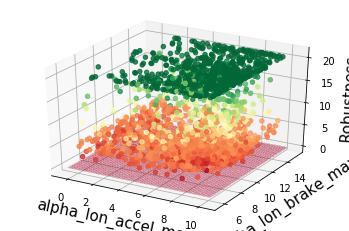

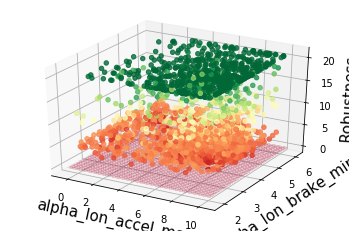

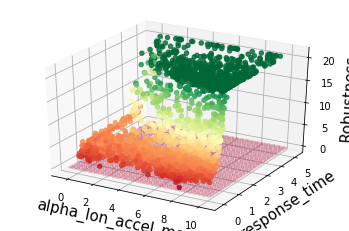

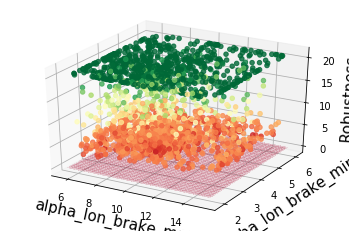

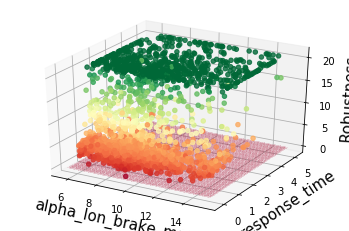

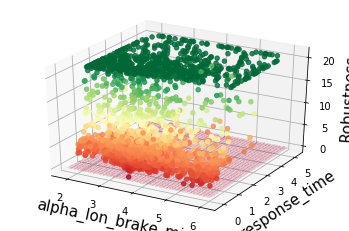

In [21]:
## combination of the variables
comb_var = combinations([x1, x2, x3, x4], 2) 

## combination of the names
comb_names = combinations([X1_name, X2_name, X3_name, X4_name], 2) 
names_list = list(comb_names)
           
for i, var in enumerate(list(comb_var)):
    X1 = var[0]
    X2 = var[1]
    search_name_x = names_list[i][0]
    search_name_y = names_list[i][1]
    
    fig = plt.figure(i)
    
    ## Plot data

    data = np.column_stack((X1,X2,R))
    ax = plt.axes(projection='3d')    

    ax.scatter3D(X1, X2, R, c=R, cmap=cm.RdYlGn, alpha=0.8)
    ax.set_xlabel(search_name_x, fontsize=fontsize)
    ax.set_ylabel(search_name_y, fontsize=fontsize)
    ax.set_zlabel('Robustness', fontsize=fontsize)
    plt.tick_params(labelsize=10) 
    
    
    ## Plot 0 flat mesh
    
    y_lim= ax.get_ylim()
    x_lim= ax.get_xlim()
    
    step = 0.1
    x_min = float(x_lim[0])
    x_max = float(x_lim[1])
    y_min = float(y_lim[0])
    y_max = float(y_lim[1])

    X_mesh,Y_mesh = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    ## Plot surface mesh 
        
    if flag_plot_surface:

        XX = X_mesh.flatten()
        YY = Y_mesh.flatten()

        A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
        C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
        Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X_mesh.shape)
        ax.plot_surface(X_mesh, Y_mesh, Z, rstride=1, cstride=1, alpha=0.8, cmap=cm.RdYlGn, linewidth=0, antialiased=False)

    ax.plot_surface(X_mesh, Y_mesh, X_mesh*0, rstride=1, cstride=1, alpha=0.1, cmap=cm.RdYlGn, linewidth=0, antialiased=False)

    figname = os.path.join(FOLDER_PATH, scenario + '_' + search_name_x + '_vs_' + search_name_y + '.png')
    
    plt.savefig(figname, dpi=200)

    plt.show()